# Introduction

The Sickle Cell Dataset is the very first Uganda Based Data Collected of Its Kind. We are excited to have been among the first to interact with it. This Notebook shows how we trained a model to classify the Images.

In [2]:
import seaborn as sns
import plotly.express as px 
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
sample_image = "Positive/Labelled/1.jpg"

In [4]:
image = plt.imread(sample_image)
print(image.shape)

(1028, 1000, 3)


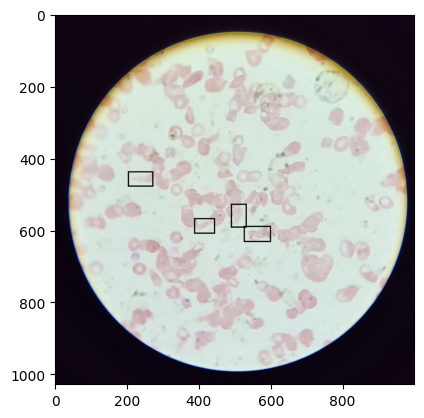

In [5]:
plt.imshow(image)

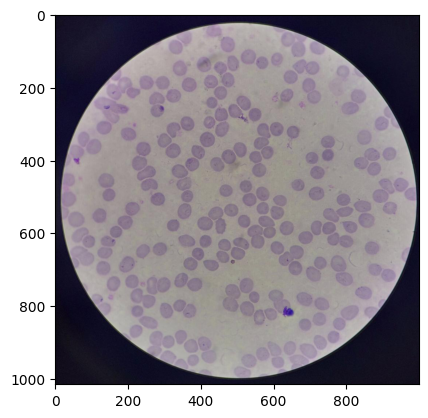

In [6]:
neg_image = plt.imread("Negative/Clear/1.jpg")
plt.imshow(neg_image)

In [7]:
import os

negative_imgs = len(os.listdir("Negative/Clear"))
positive_imgs = len(os.listdir("Positive/Labelled"))

print("total images = ", (negative_imgs + positive_imgs))

total images =  571


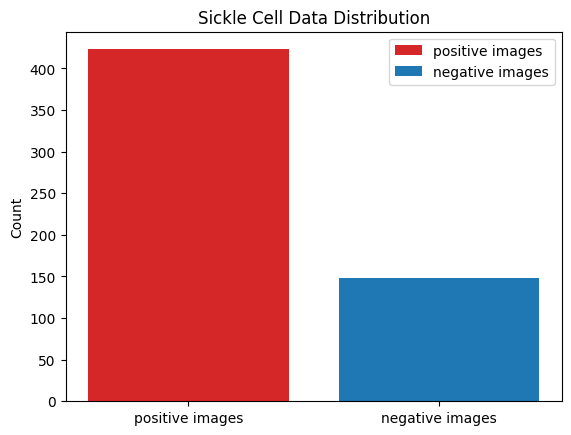

In [9]:
fig, ax = plt.subplots()

fruits = ['positive images', 'negative images']
counts = [positive_imgs, negative_imgs]
bar_labels = ['positive images', 'negative images']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Count')
ax.set_title('Sickle Cell Data Distribution')
ax.legend()


In [10]:
data_df = pd.DataFrame(columns = ["Image dir", "Label"])

In [11]:
positive_img_dir = "Positive/Labelled"
negative_img_dir = "Negative/Clear"

In [12]:
import os
import re
import cv2

Images = []
Labels = []

#append in the  postive Images
for file_dir, _, files in os.walk(positive_img_dir):
    for file in files:
        img_file = os.path.join(file_dir, file)
        img = cv2.imread(img_file)
        img = cv2.resize(img, (255, 255))
        Images.append(img)
        Labels.append(1)

In [13]:
#append in the negative Images
for file_dir, _, files in os.walk(negative_img_dir):
    for file in files:
        img_file = os.path.join(file_dir, file)
        img = cv2.imread(img_file)
        img = cv2.resize(img, (255, 255))
        Images.append(img)
        Labels.append(0)

In [14]:
Images = np.array(Images)

Images.shape

(572, 255, 255, 3)

Text(0.5, 1.0, 'Postive')

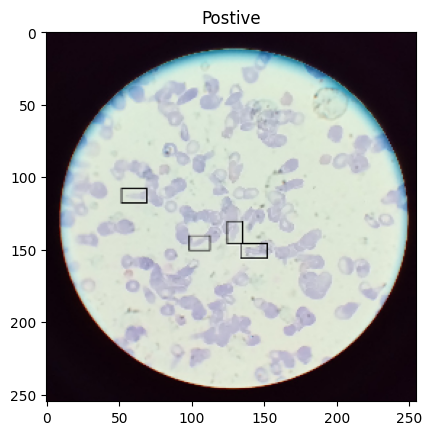

In [15]:
sample = Images[0]

plt.imshow(sample)
plt.title("Postive")

Text(0.5, 1.0, 'Negative')

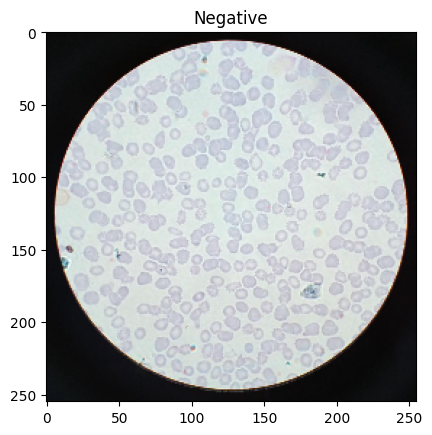

In [16]:
sample = Images[-1]
plt.imshow(sample)
plt.title("Negative")

# Train the models

In [25]:
X = Images / 255 #scale the data
y = Labels

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_X, test_X, train_y, test_y = train_test_split(X, np.array(y), stratify = np.array(y),
                                                    random_state = 42,
                                                    shuffle = True, test_size = 0.2)

train_X.shape, test_X.shape, train_y.shape, test_y.shape

((457, 255, 255, 3), (115, 255, 255, 3), (457,), (115,))

In [28]:
np.unique(train_y, return_counts = True) , np.unique(test_y, return_counts = True)

((array([0, 1]), array([119, 338], dtype=int64)),
 (array([0, 1]), array([30, 85], dtype=int64)))

# Accuracy_score for data
Wen dealing with the normal ML models, we have to ensure the data is 2 dimensional, so the first step is to reshape the data to a 2d format

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

In [40]:
def get_score(y_pred, y_true):
    print("Accuracy score - ", accuracy_score(y_pred, y_true))
    print("Precision score - ", precision_score(y_pred, y_true))
    print("Recall score - ", recall_score(y_pred, y_true))
    print("f1 score - ", f1_score(y_pred, y_true))
    print("----------  Classification Report   -------")
    print(classification_report(y_pred, y_true))

    matrix = confusion_matrix(y_pred, y_true)
    sns.heatmap(matrix, cmap='Blues', annot=True, fmt='d')

# CNN Model

In [17]:
from tensorflow import keras

In [18]:
# Importing all necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model

img_width, img_height = 255, 255
input_shape = (img_width, img_height, 3)

In [19]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


C:\Users\raj\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 254, 254, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,936,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,949,185 (15.06 MB)

 Trainable params: 3,949,185 (15.06 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [22]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
# Add a callback to avoid overfitting

model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = "best_model.keras",
    monitor='val_accuracy',
    save_best_only=True
)

In [30]:
history = model.fit(train_X, train_y, validation_data = (test_X, test_y),
          epochs = 10, callbacks = [model_checkpoint])

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 852ms/step - accuracy: 0.5443 - loss: 1.2666 - val_accuracy: 0.7391 - val_loss: 0.6143
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 743ms/step - accuracy: 0.7353 - loss: 0.6081 - val_accuracy: 0.7391 - val_loss: 0.5731
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 750ms/step - accuracy: 0.7532 - loss: 0.5731 - val_accuracy: 0.7391 - val_loss: 0.5805
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 747ms/step - accuracy: 0.7581 - loss: 0.5896 - val_accuracy: 0.7391 - val_loss: 0.6043
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 758ms/step - accuracy: 0.7428 - loss: 0.5715 - val_accuracy: 0.7391 - val_loss: 0.5596
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 751ms/step - accuracy: 0.7672 - loss: 0.5467 - val_accuracy: 0.7391 - val_loss: 0.5367
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 749ms/step - accuracy: 0.7479 - loss: 0.5322 - val_accuracy: 0.7304 - val_loss: 0.4674
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 801ms/step - accuracy: 0.7675 - loss: 0.4331 - val_accu

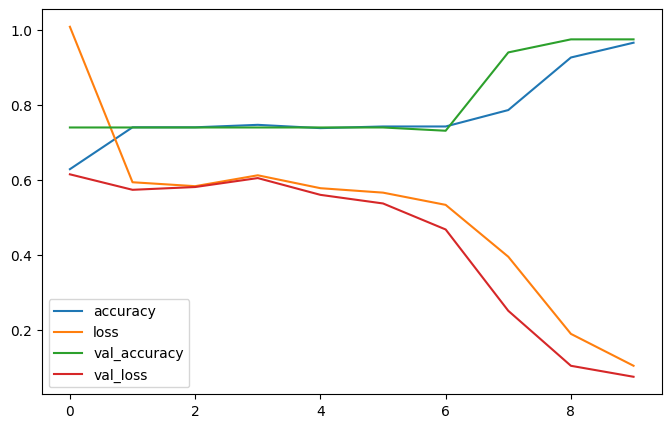

In [31]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [32]:
best_model = keras.models.load_model("best_model.keras")

# Test the model

In [33]:
predictions = best_model.predict(test_X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step


In [34]:
predictions = np.round(predictions)

In [35]:
y_pred = model.predict(train_X)
y_pred

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step


array([[0.99999976],
       [0.12416708],
       [0.9999714 ],
       [0.1282255 ],
       [1.        ],
       [0.99999523],
       [0.99999994],
       [0.9999993 ],
       [0.06012345],
       [1.        ],
       [1.        ],
       [0.04594314],
       [0.9996771 ],
       [0.99999994],
       [0.99943817],
       [0.9996368 ],
       [0.9997981 ],
       [0.99999875],
       [0.99998885],
       [0.90819716],
       [1.        ],
       [0.79426247],
       [0.99999994],
       [0.18265639],
       [0.9999995 ],
       [0.99999994],
       [0.99884665],
       [0.05425639],
       [0.19419917],
       [1.        ],
       [0.9902401 ],
       [0.9998388 ],
       [0.9999987 ],
       [1.        ],
       [0.28511846],
       [1.        ],
       [1.        ],
       [0.4084734 ],
       [0.04697813],
       [0.11937029],
       [0.06501333],
       [0.9938067 ],
       [0.997424  ],
       [0.9999569 ],
       [0.9994694 ],
       [1.        ],
       [0.261215  ],
       [0.106

Accuracy score -  0.9890590809628009
Precision score -  0.985207100591716
Recall score -  1.0
f1 score -  0.992548435171386
----------  Classification Report   -------
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       124
         1.0       0.99      1.00      0.99       333

    accuracy                           0.99       457
   macro avg       0.99      0.98      0.99       457
weighted avg       0.99      0.99      0.99       457



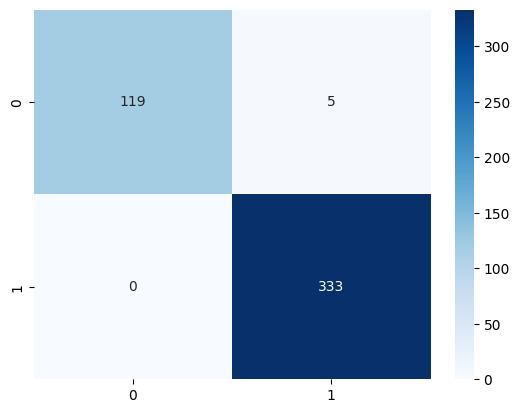

In [41]:
y_pred = np.round(y_pred)
get_score(y_pred, train_y)

In [ ]:
get_score(predictions, test_y)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [ ]:
class DCNNSCD(nn.Module):
    def __init__(self,input_channels : int, output_shape : int):
        super().__init__()
        self.cnn_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels= input_channels,
                out_channels=32,
                kernel_size = 2,
                padding = 1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride = 2)
        )

        self.cnn_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels = 32,
                out_channels=64,
                kernel_size = 2,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride = 2)
        )

        self.cnn_block_3 = nn.Sequential(
            nn.Conv2d(
                in_channels = 64,
                out_channels= 64,
                kernel_size = 2,
                stride = 1,
                padding = 1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )

        self.output_block = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=50176, out_features=64),
            nn.Dropout(p=0.5),
            nn.Linear(in_features = 64, out_features=32),
            nn.Linear(in_features=32, out_features=1)
        )

    def forward(self, x):
        x = self.cnn_block_1(x)

        x = self.cnn_block_2(x)

        x = self.cnn_block_3(x)

        x = self.output_block(x)

        return x


model = DCNNSCD(input_channels=3, output_shape=1).to(device)
model